# Introduction
> It is common to have access to thousands and even hundreds of thousands of features.  We often want to  transformed a `256 × 256–pixel` color image into `196,608 features`.
>> Furthermore, because each of these pixels can take one of `256` possible values, our observation can take `256196608 different configurations`.
>_________________________________________________
> Fortunately, not all features are created equal, and the goal of feature extraction for
dimensionality reduction is to transform our set of features `(o)` such that we end
up with a new set `(n)` where `o > n`, while still keeping much of the underlying
information.
> > Put another way, we reduce the number of features with only a small
loss in our data’s ability to generate high-quality predictions
>________________________________________
> - One downside of the feature extraction techniques we discuss is that the new features
we generate will not be interpretable by humans.
>> They will contain as much or nearly as much ability to train our models but will appear to the human eye as a
collection of random numbers.<br><br>
>> - If we wanted to maintain our ability to interpret our
models, dimensionality reduction through feature selection is a better option.
>>> During feature selection we remove features we deem unimportant but keep other features as they currently are. It leaves the features
we don’t drop intact and therefore fully interpretable by humans during analysis.

# Reducing Features Using Principal Components
> Principal component analysis (PCA) is a popular `linear` dimensionality reduction technique.
> > PCA projects observations onto the `(hopefully fewer)` principal components of the feature matrix that retain the most variance in the data, which, practically, means we retain information.
> > - PCA is an unsupervised technique, meaning that it does not use the information from the target vector and instead only considers the
feature matrix.
>______________________________________________________________
> 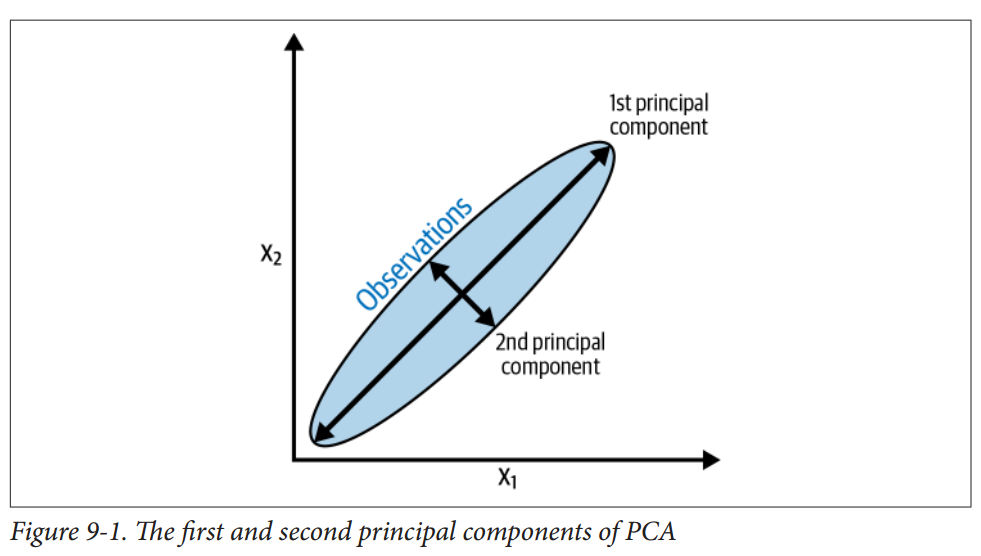
> <br>
> In the above image, our data contains two features, x1 and x2.
> > Looking at the visualization, it should be clear that observations are spread out like a cigar, with
a lot of length and very little height.
> >> More specifically, we can say that the variance
of the `“length”` is significantly greater than the `“height”`.
> >> - Instead of length and height, we refer to the `“direction”` with the most variance as the first principal component
and the “direction” with the second-most variance as the second principal component (and so on).
>_________________________________________________________
> PCA is an acceptable trade-off:
> > If we wanted to reduce our features, one strategy would be to project all observations
in our two-dimensional space onto the one-dimensional principal component.
> > - We would `lose` the information captured in the second principal component

In [1]:
# If you want to reduce the number of features while retaining the variance (important information),
# use principal component analysis with scikit’s PCA:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
# Load the data
digits = datasets.load_digits()
# Standardize the feature matrix
features = StandardScaler().fit_transform(digits.data)
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# Conduct PCA
features_pca = pca.fit_transform(features)
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])
# Original number of features: 64
# Reduced number of features: 54

Original number of features: 64
Reduced number of features: 54


> - PCA is implemented in `scikit-learn` using the PCA class.
>> 1. `n_components` has two operations, depending on the argument provided.
>>> - If the argument is `greater than 1`, pca will return that `many features`.
>>> - If the argument to `n_components` is `between 0 and 1`, pca returns the `minimum number of features that retain that much variance`.
>>>> - It’s common to use values of `0.95 and 0.99`, meaning 95% and 99% of the variance of the original features has been retained, respectively. 
>> 2. `whiten=True` transforms the values of each principal component so that they have `zero mean and unit variance`.
>> 3. `svd_solver="randomized"`, implements a stochastic algorithm to find the first principal components in often significantly less time.
>_____________________________________
> **Note:** The output of above code shows that PCA enables us to reduce our dimensionality by 10 features while still retaining 99% of the information (variance) in the feature matrix.

# Reducing Features When Data Is Linearly Inseparable
> - Standard PCA uses linear projection to reduce the features. If the data is linearly separable (i.e., you can draw a straight line or hyperplane between different classes) then PCA works well.
>___________________________________________________________________________
> 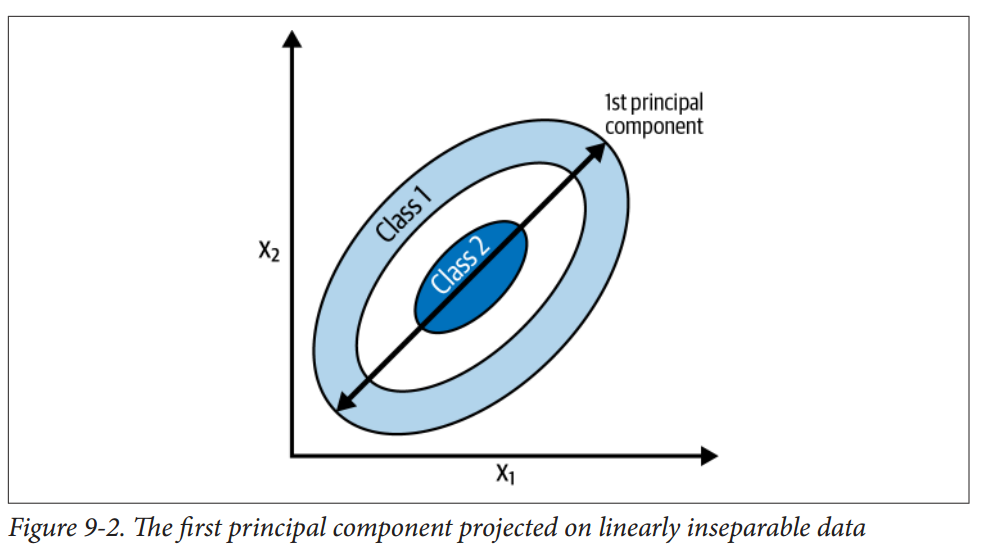
> - However, if your data is not linearly separable (i.e., you can only separate classes using a curved decision boundary) like the above image, the linear transformation will not work.
>__________________________________________________________
> If we used linear PCA to reduce the dimensions of our data, the two classes would be linearly projected onto the first principal component such that they would become inter twined like the below image:
> <br>
> 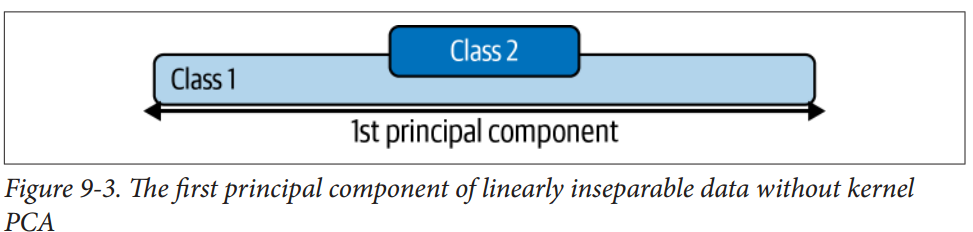
> ___________________________________
> Ideally, we would want a transformation that would reduce the dimensions and make
the data linearly separable.
> > `Kernel PCA` can do both, as shown below:
> > 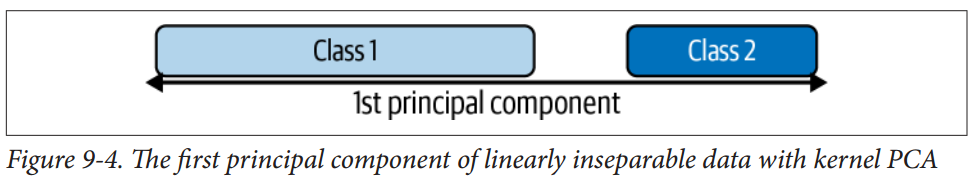
> > <br>
>> Kernels allow us to project the linearly inseparable data into a higher dimension
where it is linearly separable; this is called the `“kernel trick”`:
> > > Just think of kernels as different ways of projecting the data. There are a number of kernels we can use in scikit-learn’s
`kernelPCA` class, specified using the kernel parameter.
> > > > 1. the Gaussian radial basis function kernel rbf,
> > > > 2. the polynomial kernel (poly)
> > > > 3. the sigmoid kernel (sigmoid).
> > > > 4. the linear projection (linear), which will produce the same results as standard PCA.
>____________________________________________________________
>> One downside of kernel PCA is that we need to specify a number of parameters.
>>> **Example:** in the first code example we set `n_components` to `0.99` to make PCA select the number of components to `retain 99%` of the variance. We `don’t have this option in kernel PCA`.
>>>> Instead we have to define the number of components (e.g., n_components=1).
>> another downside is that kernels come with their own hyperparameters that we will have to set, like the radial basis function requires a `gamma` value.

> **Question:** how do we know which values to use?<br><br>
> **Answer:** Through trial and error. Specifically, we can train our machine learning model multiple times, each time with a different kernel
or different value of the parameter.


In [2]:
# If you suspect you have linearly inseparable data and want to reduce the dimensions.
# use an extension of principal component analysis that uses kernels to allow for nonlinear dimensionality reduction:
# Load libraries
from sklearn.decomposition import PCA, KernelPCA
# we used scikit-learn’s make_circles to generate a simulated dataset with a target vector of two classes and two features.
# make_circles makes linearly inseparable data; specifically, one class is surrounded on all sides by the other class
from sklearn.datasets import make_circles
# Create linearly inseparable data
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
# Apply kernel PCA with radius basis function (RBF) kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kpca.shape[1])
# Original number of features: 2
# Reduced number of features: 1

Original number of features: 2
Reduced number of features: 1


# Reducing Features by Maximizing Class Separability
> `LDA` is a `classification` that is also a `popular` technique for `dimensionality reduction`.
>> LDA works similarly to PCA in that it projects our feature space onto a lower dimensional space.
>> > However, in PCA we were interested only in the component axes that maximize the variance in the data, while in LDA we have the additional goal of `maximizing the differences between classes`.
>_______________________________________
> 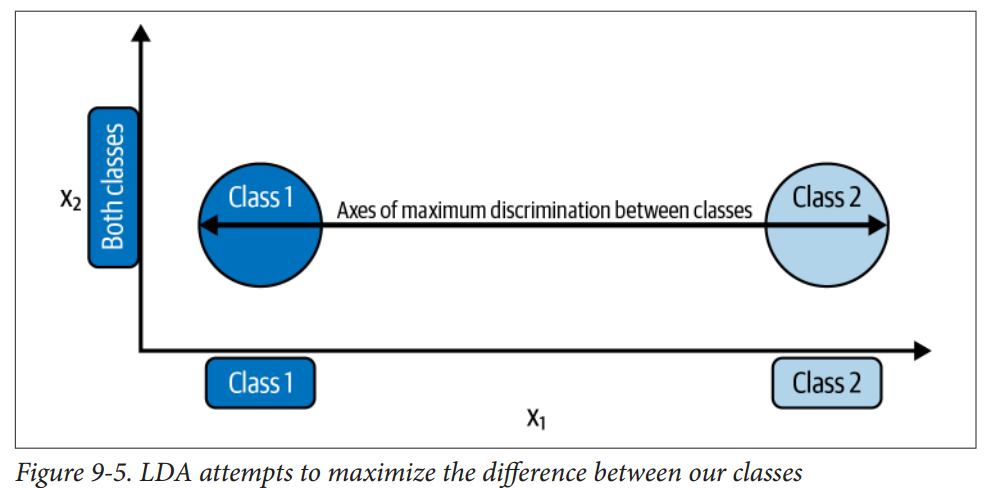
> <br>
> In the above diagram, we have data comprising two target classes and two features.
> > If we project the data onto the y-axis, the two classes are not easily separable (i.e., they overlap), while if we project the data onto
the x-axis, we are left with a feature vector (i.e., we reduced our dimensionality by one) that still preserves class separability.
>__________________________________________
> In scikit-learn, LDA is implemented using `LinearDiscriminantAnalysis`, which
includes a parameter, `n_components`, indicating `the number of features we
want returned`.
> > To figure out what argument value to use with `n_components` (e.g., how many parameters to keep), we can take advantage of the fact that
`explained_variance_ratio_` that tells us the variance explained by each outputted feature which is a sorted array.

In [3]:
# If you want to reduce the number of features to be used by a classifier by maximizingthe separation between the classes,
# use linear discriminant analysis (LDA) to project the features onto component axes that maximize the separation of classes:
# Load libraries
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Load Iris flower dataset:
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create and run an LDA, then use it to transform the features
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)
# Print the number of features
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_lda.shape[1])
# Original number of features: 4
# Reduced number of features: 1

Original number of features: 4
Reduced number of features: 1


- We can use `explained_variance_ratio_` to view the amount of `variance explained` by each component.
- In above code the single component explained over 99% of the variance:

In [4]:
lda.explained_variance_ratio_
# array([0.9912126])

array([0.9912126])

- Specifically, we can run `LinearDiscriminantAnalysis` with `n_components` set to `None` to return the ratio of variance explained by `every component feature`.
- Then we can calculate how many components are required to get above some threshold of variance
explained (often 0.95 or 0.99):

In [7]:
# Create and run LDA
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)
# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_
# Create function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    # Set initial number of features
    n_components = 0
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        # Add the explained variance to the total
        total_variance += explained_variance
        # Add one to the number of components
        n_components += 1
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
    # Return the number of components
    return n_components
# Run function
select_n_components(lda_var_ratios, 0.95)

1

# Reducing Features Using Matrix Factorization
> `NMF` is an `unsupervised` technique for `linear dimensionality reduction` that factorizes the feature matrix into matrices representing the latent relationship between observations and their features (i.e., breaks up into multiple matrices whose product approximates the original matrix).
>> We can say `NMF` can reduce dimensionality because in matrix multiplication, the two factors (matrices being multiplied) can have significantly fewer dimensions than the product matrix.
>> But formally speaking:
>> > given a desired number of returned features, r, NMF factorizes our feature matrix such that:
>>>> `V ≈ W*H`
>>>> - where `V` is our `n × d` feature matrix (i.e., d features, n observations), `W` is an `n × r`
matrix, and `H` is an `r × d` matrix.
>>>> - By adjusting the value of `r` we can set the amount of dimensionality reduction desired.
>______________________________
> One major requirement of NMF is that, as the name implies, the feature matrix `cannot contain negative values`.
> > Unlike PCA and other techniques, NMF does not provide the `explained variance` of the outputted features.
>>> Thus, the best way for us to find the optimum value of `n_components` is by trying a range of values to find the one that produces the best result in our end model

In [8]:
# If you have a feature matrix of nonnegative values and want to reduce the dimensionality,
# use nonnegative matrix factorization (NMF) to reduce the dimensionality of the feature matrix:
# Load libraries
from sklearn.decomposition import NMF
from sklearn import datasets
# Load the data
digits = datasets.load_digits()
# Load feature matrix
features = digits.data
# Create, fit, and apply NMF
nmf = NMF(n_components=10, random_state=4)
features_nmf = nmf.fit_transform(features)
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_nmf.shape[1])

Original number of features: 64
Reduced number of features: 10


# Reducing Features on Sparse Data
> `TSVD` is similar to `PCA` and, in fact, `PCA` often uses `nontruncated Singular Value
Decomposition (SVD)` in one of its steps.
> > Given `d features`, `SVD` will create factor matrices that are `d × d`, whereas `TSVD` will return factors that are `n × n`, where `n is
previously specified by a parameter`.
> > > The practical advantage of TSVD is that, unlike PCA, it works on `sparse` feature matrices.
>___________________________
> One issue with TSVD:
> > because of how it uses a random number generator, the signs of the output can flip between fittings.
> > > An easy workaround is to use fit only once per preprocessing pipeline, then use transform multiple times.
>_____________________________________
> As with linear discriminant analysis, we have to `specify the number of features` (components) we want to output. This is done with the `n_components` parameter.
>> The optimum number of components can be found by including n_components as a hyperparameter to optimize during model selection
`(i.e., choose the value for n_components that produces the best-trained model)`.
> **OR**
>> Because TSVD provides the ratio of the original feature matrix’s variance explained by each component, we can select the number of components that explain a desired amount of variance (95% and 99% are common values)

In [11]:
# If you have a sparse feature matrix and want to reduce the dimensionality,
# use Truncated Singular Value Decomposition (TSVD):
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np
# Load the data
digits = datasets.load_digits()
# Standardize feature matrix
features = StandardScaler().fit_transform(digits.data)
# Make sparse matrix
features_sparse = csr_matrix(features)
# Create a TSVD
tsvd = TruncatedSVD(n_components=10)
# Conduct TSVD on sparse matrix
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)
features_sparse_tsvd.shape

(1797, 10)

In [12]:
# Alternatively, we can select the number of components that explain a desired amount of variance (95% and 99% are common values). 
# The first three outputted components explain approximately 30% of the original data’s variance:
# Sum of first three components' explained variance ratios
tsvd.explained_variance_ratio_[0:3].sum()
# 0.300393853728722

0.3003938538036915

In [13]:
# We can automate the process by creating a function 
# that runs TSVD with n_components set to one less than the number of original features 
# and then calculate the number of components that explain a desired amount of the original data’s variance:
# Create and run a TSVD with one less than number of features
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)
# List of explained variances
tsvd_var_ratios = tsvd.explained_variance_ratio_
# Create a function
def select_n_components(var_ratio, goal_var):
    # Set initial variance explained so far
    total_variance = 0.0
    # Set initial number of features
    n_components = 0
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        # Add the explained variance to the total
        total_variance += explained_variance
        # Add one to the number of components
        n_components += 1
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
    # Return the number of components
    return n_components
# Run function
select_n_components(tsvd_var_ratios, 0.95)
# 40

40

# END of chapter 9 --> dimension reduction using feature extraction